In [2]:
#Ignoring TF warning messages
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" #

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [6]:
import keras
from keras import layers
encoding_dim = 32 # This is our input image
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded) 

2024-03-22 14:30:17.139535: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 14:30:17.259738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 14:30:17.259808: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 14:30:17.264315: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 14:30:17.264378: I external/local_xla/xla/stream_executor

In [7]:
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,)) # Retrieve the last layer of the autoencoder model 
decoder_layer = autoencoder.layers[-1]# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, 
epochs=50,batch_size=256,shuffle=True, validation_data=(x_test, x_test)) 

Epoch 1/50


2024-03-22 14:30:37.722471: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f21b070da00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-22 14:30:37.722527: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-03-22 14:30:37.736768: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-22 14:30:37.768884: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1711098037.864334   12788 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 [==============================] - 3s 8ms/step - loss: 0.2783 - val_loss: 0.1925
Epoch 2/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1727 - val_loss: 0.1546
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1442 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1278 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1178 - val_loss: 0.1126
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1109 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1059 - val_loss: 0.1026
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1022 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0995 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0976 - val_loss: 0.0955
Epoch 11/5

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs) 

313/313 [==============================] - 0s 1ms/step


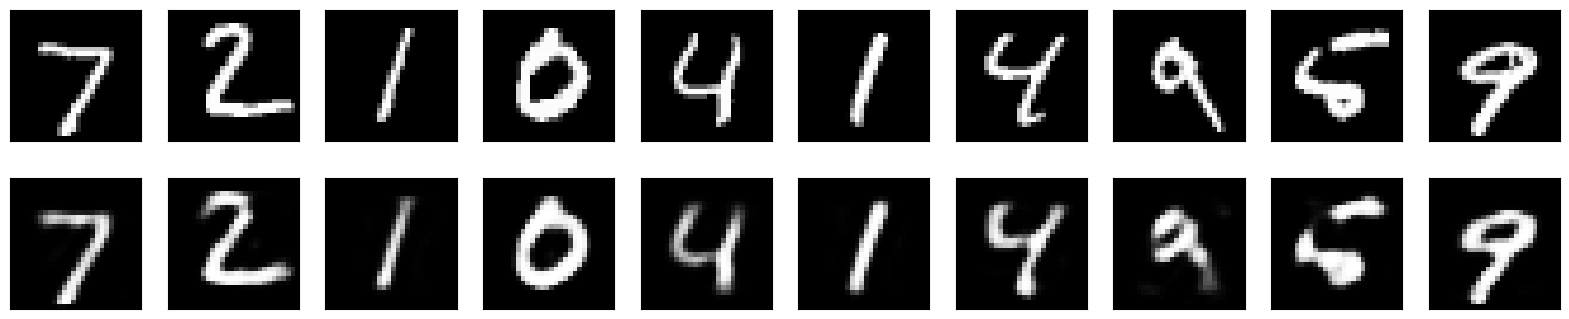

In [13]:
import matplotlib.pyplot as plt
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n): # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) 
plt.show()  #